#                   פרויקט חקר ביצועים 2 - תכנות דינמי

###### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

In [2]:
def f(x,f_opt,F,C,P): #the optimal function
    return (F + C*x + f_opt*((P)**x))

הפונקציה הבאה מוצאת את המינימום 

In [3]:
def get_minimum(T,F,C,P): 
    #I just added this function to make the code more readable
    return (minimize_scalar(f, args=(T,F,C,P)).x)

Here we find the optimal point. because our x must be an integer, we check the real x (+- the points).
בדיקת הכמות האופטימלית שנאצה לייצר בשלב מסוים שתמזער את תוחלת העלות:
מציאת המינימום
בדיקה מהו הערך האופטימלי: המספר השלם +-1
בדיקה אם האופטימום קטן מהאופטימום בשלב הקודם

In [4]:
def find_optimum(last_opt,F,C,P):
    opt_x = [] #list of the optimal x in specific K
    X = get_minimum(last_opt,F,C,P) #the number of products to produce
    if(f(int(X),last_opt,F,C,P) == f(int(X+1),last_opt,F,C,P)):
        opt_x.append(int(X))
        opt_x.append(int(X+1))
    else:
         if(f(int(X),last_opt,F,C,P) < f(int(X+1),last_opt,F,C,P)):
            opt_x.append(int(X))
         else:
            opt_x.append(int(X+1))
            
    if(last_opt < f(opt_x[0],last_opt,F,C,P)):
        opt_x.clear()
        opt_x.append(last_opt)
    else:
        if(last_opt == f(opt_x[0],last_opt,F,C,P)):
            opt_x.append(0)
    final = [f(opt_x[0],last_opt,F,C,P),opt_x] #list of the optimal f , x
    return(final)

In [5]:
def ex_1(T,F,C,P,K,tables={}): #Warning: DON'T ENTER ANY TABLE !!!, Just T,F,C,P,K
    if(K==0): #ending
        return(tables) #contains all the tables
    f_opt = T #the optimal value in the last table(from K+1)
    opt_table = find_optimum(f_opt,F,C,P)
    tables['K'+str(K)] = opt_table
    return(ex_1(opt_table[0],F,C,P,K-1,tables))

האלגוריתמים הבאים הינם להדפסת הפתרון בצורה מסודרת ויפה
האלגוריתם הראשון מדפיס את הפתרון הסופי
האלגוריתם השני מדפיס את הטבלאות עבור כל שלב...
אפשר להדפיס את הפתרון תוך האלגוריתם עצמו, אבל האלגוריתם יהיה ארוך. עשיתי שני אלגוריתמים להדפסה כך שיהיה יותר פשוט להבנה.

In [6]:
def final_solution(Tables): #for printing the final solution
    dic = {}
    dic["f*"+str(1)] = Tables.get('K'+str(1))[0]
    for i in range(len(Tables),0,-1):
        dic["X*"+str(i)] = str(Tables.get('K'+str(i))[1])
    return(pd.DataFrame(dic,index=['opt']).transpose())

In [7]:
def print_tables(T,K,Tables):
    secondrow = [] #for adding the s = 0 option
    if(K==0): #now print the final solution
        print('Summary, Final Solution: ')
        return(final_solution(Tables))
    
    if(K == len(Tables)): 
        t = {0:T}
    else:
        t = {0:Tables.get('K'+str(K+1))[0]}
    for i in range(len(Tables.get('K'+str(K))[1])):
        t[Tables.get('K'+str(K))[1][i]]=Tables.get('K'+str(K))[0]
            
    t['f*'+str(K)] = Tables.get('K'+str(K))[0]
    t['X*'+str(K)] = str(Tables.get('K'+str(K))[1])
    print('K = {}:'.format(K))
    Ktable = pd.DataFrame(t,index=['s = 1'])
    
    for i in range(len(Ktable.columns)): #for adding the s = 0 option
        if(i == 0 or i==(len(Ktable.columns)-1) or i==(len(Ktable.columns)-2)):
            secondrow.append(0)
        else:
            secondrow.append('-')
            
    Ktable.loc['s = 0'] = secondrow
    print(Ktable)
    print('------------------------------------------')
    return(print_tables(T,K-1,Tables))

:עכשיו הפתרון

In [8]:
Tables = ex_1(T=5200,F=520,C=10,P=1/3,K=52)
print_tables(5200,52,Tables)

K = 52:
          0        6        f*52 X*52
s = 1  5200  587.133  587.133059  [6]
s = 0     0        -    0.000000    0
------------------------------------------
K = 51:
                0        4        f*51 X*51
s = 1  587.133059  567.249  567.248556  [4]
s = 0    0.000000        -    0.000000    0
------------------------------------------
K = 50:
                0        4        f*50 X*50
s = 1  567.248556  567.003  567.003069  [4]
s = 0    0.000000        -    0.000000    0
------------------------------------------
K = 49:
                0    4        f*49 X*49
s = 1  567.003069  567  567.000038  [4]
s = 0    0.000000    -    0.000000    0
------------------------------------------
K = 48:
                0    4   f*48 X*48
s = 1  567.000038  567  567.0  [4]
s = 0    0.000000    -    0.0    0
------------------------------------------
K = 47:
           0    4   f*47 X*47
s = 1  567.0  567  567.0  [4]
s = 0    0.0    -    0.0    0
------------------------------------------
K

,opt
f*1,567
X*52,[6]
X*51,[4]
X*50,[4]
X*49,[4]
X*48,[4]
X*47,[4]
X*46,[4]
X*45,[4]
X*44,[4]


:חלק ב סעיף 1

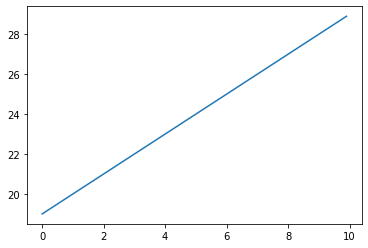

In [9]:
def f(x):
    return (3 + x + 16*((1)**x)) #parameters from the example(not affecting the solution)
x = np.arange(0, 10, 0.1)
plt.plot(x, f(x))

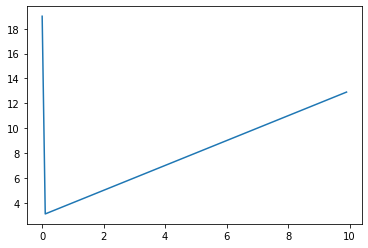

In [10]:
def f(x):
    return (3 + x + 16*((0)**x)) #parameters from the example(not affecting the solution)
x = np.arange(0, 10, 0.1)
plt.plot(x, f(x))